# Центральная предельная теорема своими руками

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Мною было выбрано **экспоненциальне распределение**. В ячейке ниже мы объявляем само распределение, получаем его мат.ожидание и дисперсию.

In [2]:
exp_rv = sts.expon()
mean, var = exp_rv.stats(moments='mv')

Далее, генерируем выборку объема $1000$, строим гистограмму и поверх нее рисуем теоретическую плотность.

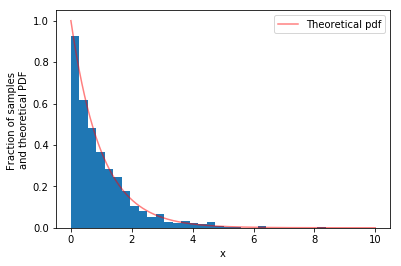

In [3]:
sample = exp_rv.rvs(1000)
plt.hist(sample, bins=30, density=True)

x = np.linspace(0,10,1000)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, color='red', label='Theoretical pdf', alpha=0.5)

plt.legend()
plt.ylabel('Fraction of samples \nand theoretical PDF')
_ = plt.xlabel('x')

Затем, реализуем функцию, которая для любого значения $n$ генерирует $1000$ выборок объёма $n$ и строит гистограмму распределений их выборочных средних. Поверх каждой гистограммы рисуется плотность соответствующего нормального распределения.

In [38]:
def show_cpt(n):
    samples = [exp_rv.rvs(n) for i in range(10000)]
    means = [np.mean(sample) for sample in samples]
    plt.hist((means - mean) * math.sqrt(n) / var, bins = 50, density=True)
    
    norm_rv = sts.norm(0, 1)
    x = np.linspace(-10.0, 10.0, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, color='red', label='Theoretical pdf', alpha=0.5)
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Fraction of samples \n and PDF')

Вызываемся при $n=5$.

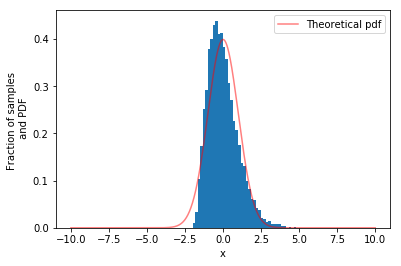

In [62]:
show_cpt(5)

Вызываемся при $n=10$.

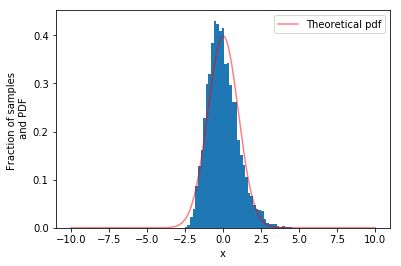

In [40]:
show_cpt(10)

Вызываемся при $n=50$.

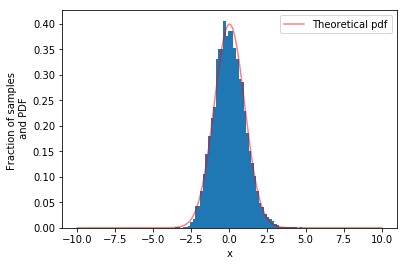

In [41]:
show_cpt(50)

Вызываемся при $ n = 500 $.

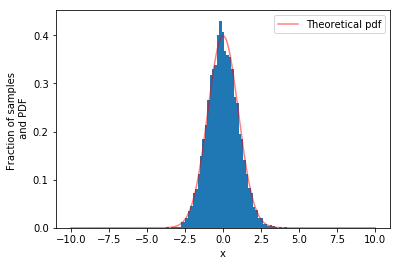

In [42]:
show_cpt(500)

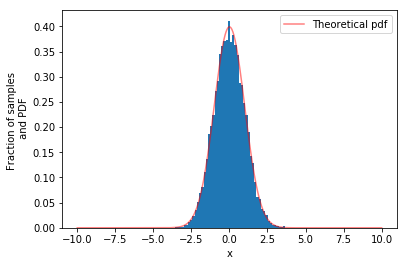

In [43]:
show_cpt(1000)

**Как результат, замечаем, что точность аппроксимации распределения выборочных средних нормальным с ростом $n$ растет**.

## Вывод
В течение выполнения задания мы собственноручно убедились в выполнении *Центральной Пределной Теоремы* и подтвердили ее правильность эксперементально.